ГРАФИКИ SEABORN

In [412]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [413]:
df = pd.read_csv('3_taxi_peru.csv', sep = ';')

In [414]:
df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


Построить следующие графики при помощи библиотек matplotlib и seaborn:
Частота встречаемости оценок водителей (те баллы, которые ставил ему клиент)

In [415]:
taxi_driver_score_count = df.groupby('driver_score', as_index = False) \
.agg({'journey_id': 'count'}) \
.rename(columns={'journey_id': 'count_marks'}) \
.sort_values('count_marks', ascending = False)
taxi_driver_score_count

,driver_score,count_marks
5,5.0,4499
4,4.0,1674
0,0.0,1094
3,3.0,227
1,1.0,94
2,2.0,62


In [416]:
sum_scores_driver = taxi_driver_score_count.count_marks.sum()
sum_scores_driver

7650

In [417]:
taxi_driver_score_count['count_marks'] = round(taxi_driver_score_count['count_marks']/sum_scores_driver*100, 1)

In [418]:
driver_score_percent = taxi_driver_score_count.sort_values('driver_score', ascending = True)
driver_score_percent=driver_score_percent.rename(columns={'count_marks': 'share'})
driver_score_percent

,driver_score,share
0,0.0,14.3
1,1.0,1.2
2,2.0,0.8
3,3.0,3.0
4,4.0,21.9
5,5.0,58.8


In [419]:
sns.set (rc={"figure.figsize":( 8 , 6)})

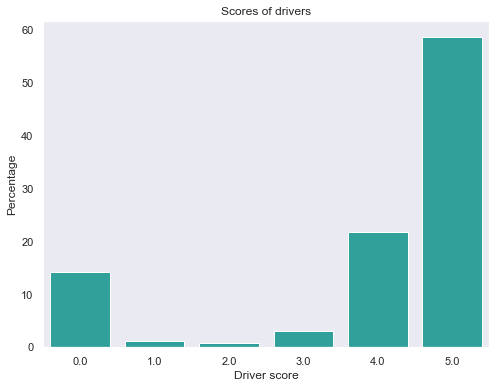

In [464]:
ax=sns.barplot(data=driver_score_percent, x="driver_score", y="share", color="lightseagreen").set(title='Scores of drivers', xlabel='Driver score', ylabel='Percentage')

2.Частота встречаемости оценок клиентов. Построить аналогичный график с заголовком и подписями осей. Сделать выводы об отличиях оценок водителей и клиентов.

In [421]:
taxi_rider_score_count = df.groupby('rider_score', as_index = False) \
.agg({'journey_id': 'count'}) \
.rename(columns={'journey_id': 'count_marks'}) \
.sort_values('count_marks', ascending = False)
taxi_rider_score_count

,rider_score,count_marks
5,5.0,13404
4,4.0,1359
0,0.0,352
3,3.0,213
1,1.0,32
2,2.0,30


In [422]:
sum_scores_rider = taxi_rider_score_count.count_marks.sum()
sum_scores_rider

15390

In [423]:
taxi_rider_score_count['count_marks'] = round(taxi_rider_score_count['count_marks']/sum_scores_rider*100, 1)
taxi_rider_score_count

,rider_score,count_marks
5,5.0,87.1
4,4.0,8.8
0,0.0,2.3
3,3.0,1.4
1,1.0,0.2
2,2.0,0.2


In [424]:
rider_score_percent = taxi_rider_score_count.sort_values('rider_score', ascending = True) \
.rename(columns={'count_marks': 'share'})
rider_score_percent

,rider_score,share
0,0.0,2.3
1,1.0,0.2
2,2.0,0.2
3,3.0,1.4
4,4.0,8.8
5,5.0,87.1


[Text(0.5, 1.0, 'Scores of riders'),
 Text(0.5, 0, 'Rider score'),
 Text(0, 0.5, 'Percentage')]

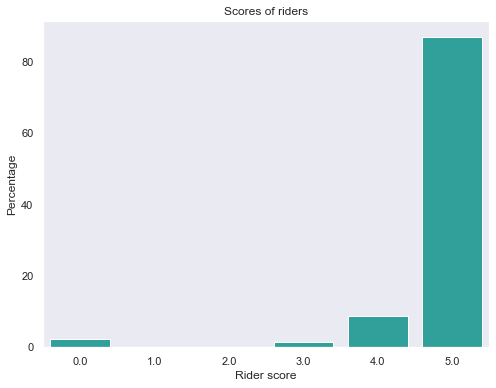

In [455]:
sns.barplot(data=rider_score_percent, x="rider_score", y="share", color="lightseagreen").set(title='Scores of riders', xlabel='Rider score', ylabel='Percentage')

In [426]:
df_new_2=pd.concat([driver_score_percent,rider_score_percent],axis=0)
df_new_2

,driver_score,share,rider_score
0,0.0,14.3,NaN
1,1.0,1.2,NaN
2,2.0,0.8,NaN
3,3.0,3.0,NaN
4,4.0,21.9,NaN
5,5.0,58.8,NaN
0,NaN,2.3,0.0
1,NaN,0.2,1.0
2,NaN,0.2,2.0
3,NaN,1.4,3.0


In [427]:
df_new_3=pd.concat([driver_score_percent,rider_score_percent],axis=0)
df_new_4 = [0.0,1.0,2.0,3.0,4.0,5.0,0.0,1.0,2.0,3.0,4.0,5.0]
df_new_3['score'] = df_new_4

In [428]:
df_new_3

,driver_score,share,rider_score,score
0,0.0,14.3,NaN,0.0
1,1.0,1.2,NaN,1.0
2,2.0,0.8,NaN,2.0
3,3.0,3.0,NaN,3.0
4,4.0,21.9,NaN,4.0
5,5.0,58.8,NaN,5.0
0,NaN,2.3,0.0,0.0
1,NaN,0.2,1.0,1.0
2,NaN,0.2,2.0,2.0
3,NaN,1.4,3.0,3.0


In [429]:
df_new_3['driver_rider']=np.where(df_new_3['driver_score']>=0,"driver","rider")

In [430]:
df_new_3

,driver_score,share,rider_score,score,driver_rider
0,0.0,14.3,NaN,0.0,driver
1,1.0,1.2,NaN,1.0,driver
2,2.0,0.8,NaN,2.0,driver
3,3.0,3.0,NaN,3.0,driver
4,4.0,21.9,NaN,4.0,driver
5,5.0,58.8,NaN,5.0,driver
0,NaN,2.3,0.0,0.0,rider
1,NaN,0.2,1.0,1.0,rider
2,NaN,0.2,2.0,2.0,rider
3,NaN,1.4,3.0,3.0,rider


In [431]:
df_new_3.pop('driver_score')

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: driver_score, dtype: float64

In [432]:
df_new_3.pop('rider_score')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
Name: rider_score, dtype: float64

In [433]:
df_new_3

,share,score,driver_rider
0,14.3,0.0,driver
1,1.2,1.0,driver
2,0.8,2.0,driver
3,3.0,3.0,driver
4,21.9,4.0,driver
5,58.8,5.0,driver
0,2.3,0.0,rider
1,0.2,1.0,rider
2,0.2,2.0,rider
3,1.4,3.0,rider


In [434]:
df_new_3.rename(columns={'share': 'share_score'})

,share_score,score,driver_rider
0,14.3,0.0,driver
1,1.2,1.0,driver
2,0.8,2.0,driver
3,3.0,3.0,driver
4,21.9,4.0,driver
5,58.8,5.0,driver
0,2.3,0.0,rider
1,0.2,1.0,rider
2,0.2,2.0,rider
3,1.4,3.0,rider


In [435]:
df_new_3.reset_index(drop= True , inplace= True )
df_new_3

,share,score,driver_rider
0,14.3,0.0,driver
1,1.2,1.0,driver
2,0.8,2.0,driver
3,3.0,3.0,driver
4,21.9,4.0,driver
5,58.8,5.0,driver
6,2.3,0.0,rider
7,0.2,1.0,rider
8,0.2,2.0,rider
9,1.4,3.0,rider


[Text(0.5, 1.0, 'Scores of drivers and riders'),
 Text(0.5, 0, 'Rider vs Driver score'),
 Text(0, 0.5, 'Percentage')]

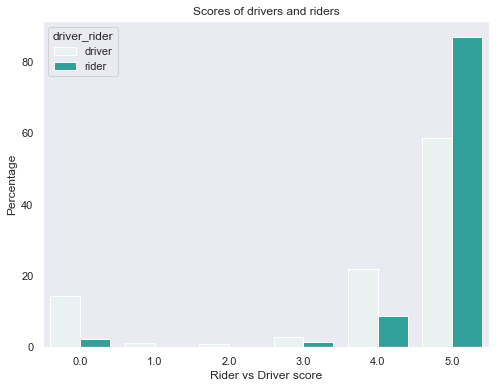

In [454]:
sns.barplot(x="score", y="share", hue="driver_rider", data=df_new_3, color="lightseagreen").set(title='Scores of drivers and riders', xlabel='Rider vs Driver score', ylabel='Percentage')

#Выводы:
#1) КЛИЕНТЫ несколько хуже оценивают ВОДИТЕЛЕЙ, у них меньше оценок в 5 баллов и больше оценок в 0 баллов. Уровень требоаний к водителям выше.
#Гораздо чаще (приблизительно на 15%) КЛИЕНТЫ ставят водителям 0 баллов - то есть крайне недовольны больше бывают именно потребители.
#2) В целом и та и другая группа (около 80% оценивают друг друга хорошо на 4 и выше)

3.	Построить график, который отвечает на вопрос, с какой платформы сделано большее количество заказов (график с заголовком, изменить цвет, размер)

In [437]:
df.end_state.value_counts()

drop off         17417
rider cancel      3976
not found         1145
driver cancel      292
failure            249
no show             20
Name: end_state, dtype: int64

In [443]:
df_platform = df.query("end_state =='drop off'")

In [439]:
df_platform = df.query("end_state =='drop off'").groupby('source', as_index = False).agg({'journey_id': 'count'}).rename(columns={'source': 'count_orders'})

In [440]:
df_platform.sort_values('journey_id', ascending=[False])

,count_orders,journey_id
3,iPhone,7383
4,web,6053
0,Android,3358
2,iPad,431
1,Wap,95


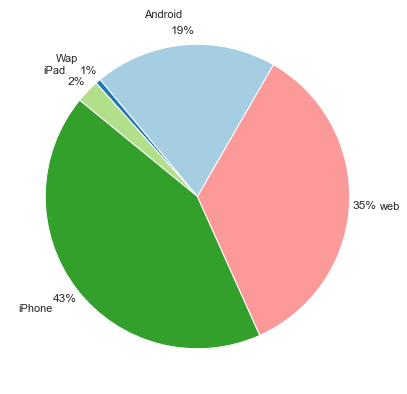

In [442]:
fig = plt.gcf()
fig.set_size_inches(7,7)
data = df_platform.journey_id
labels = df_platform.count_orders
colors = sns.color_palette('Paired')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', pctdistance=1.1, labeldistance=1.2, startangle=60)
plt.show()